Зацепина Антонина МИВТ-23-9

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Разведочный-анализ" data-toc-modified-id="Разведочный-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разведочный анализ</a></span><ul class="toc-item"><li><span><a href="#Зависимость-от-количественных-признаков" data-toc-modified-id="Зависимость-от-количественных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Зависимость от количественных признаков</a></span></li><li><span><a href="#Зависимость-от-категориальных-признаков" data-toc-modified-id="Зависимость-от-категориальных-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Зависимость от категориальных признаков</a></span></li></ul></li><li><span><a href="#Предсказания" data-toc-modified-id="Предсказания-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предсказания</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Cross-Validation,-RandomForest" data-toc-modified-id="Cross-Validation,-RandomForest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross Validation, RandomForest</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#KNeighbors" data-toc-modified-id="KNeighbors-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>KNeighbors</a></span></li></ul></li><li><span><a href="#Оценка-вероятности-страхового-случая-для-40-летнего-мужчины-без-детей-на-SUV" data-toc-modified-id="Оценка-вероятности-страхового-случая-для-40-летнего-мужчины-без-детей-на-SUV-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Оценка вероятности страхового случая для 40-летнего мужчины без детей на SUV</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
AutoInsuranceRisk = pd.read_csv('AutoInsuranceRisk_training.csv', sep=';')

# Подготовка данных

In [3]:
AutoInsuranceRisk.head(10)

,ContractId,Age,Gender,Children,Profession,Customer Type,Multiple cars,Driving Licence Years,Car category,Annual Kilometers,Gearbox,Fuel,Claim
0,1211,44,Woman,equalormorethan4,Unemployed,Agency,Yes,19,Sedan,36087,Automatic,Diesel,No
1,1212,21,Woman,0,Private Sector - Director,On-line,No,3,SUV,30367,Manual,Diesel,No
2,1213,76,Woman,1,Private Sector - Employee,Agency,No,19,SUV,27640,Automatic,Diesel,No
3,1214,29,Woman,equalormorethan4,Private Sector - Employee,On-line,No,11,Sedan,22780,Automatic,Diesel,No
4,1215,44,Man,0,Private Sector - Director,Agency,No,11,SUV,36477,Automatic,Diesel,No
5,1216,50,Man,equalormorethan4,Independant,On-line,No,9,SUV,30134,Automatic,Diesel,No
6,1219,68,Man,equalormorethan4,Private Sector - Director,Agency,Yes,11,SUV,18771,Automatic,Diesel,No
7,1220,33,Woman,0,Retired,Agency,No,14,Sport,34066,Automatic,Diesel,No
8,1221,58,Woman,equalormorethan4,Retired,Agency,No,4,Sedan,48149,Manual,Diesel,No
9,1222,20,Man,0,Public Sector - Director,Agency,No,2,Sport,10862,Manual,Petrol,No


In [4]:
AutoInsuranceRisk.shape
# 8221 срока, 13 столбцов

(8221, 13)

In [5]:
AutoInsuranceRisk.isnull().sum()
# отсутствующих значений нет

ContractId               0
Age                      0
Gender                   0
Children                 0
Profession               0
Customer Type            0
Multiple cars            0
Driving Licence Years    0
Car category             0
Annual Kilometers        0
Gearbox                  0
Fuel                     0
Claim                    0
dtype: int64

In [6]:
for col in list(AutoInsuranceRisk.columns.values):
    print(col, "- ", len(AutoInsuranceRisk[col].unique()))

# смотрим количество уникальных значений в столбцах
# ContractId - Id контракта, от него решения о страховке не зависят
# столбцы с количество уникальных значений = 2 - категориальные бинарные признаки
# Car category, Profession - также категориальные признаки
# Claim - таргет предсказания

ContractId -  8221
Age -  79
Gender -  2
Children -  5
Profession -  11
Customer Type -  2
Multiple cars -  2
Driving Licence Years -  24
Car category -  3
Annual Kilometers -  7154
Gearbox -  2
Fuel -  2
Claim -  2


In [7]:
for col in list(['Gender', 'Customer Type', 'Multiple cars', 'Gearbox', 'Fuel', 'Claim']):
    print(col, AutoInsuranceRisk[col].unique())

# заменим значения бинарных признаков на 0 и 1

Gender ['Woman' 'Man']
Customer Type ['Agency' 'On-line']
Multiple cars ['Yes' 'No']
Gearbox ['Automatic' 'Manual']
Fuel ['Diesel' 'Petrol']
Claim ['No' 'Yes']


In [8]:
binary_gender = {'Woman': 0, 'Man': 1}
AutoInsuranceRisk['Gender'] = AutoInsuranceRisk['Gender'].map(binary_gender)

In [9]:
binary_ans = {'No': 0, 'Yes': 1}
AutoInsuranceRisk['Claim'] = AutoInsuranceRisk['Claim'].map(binary_ans)
AutoInsuranceRisk['Multiple cars'] = AutoInsuranceRisk['Multiple cars'].map(binary_ans)

In [10]:
binary_ctype = {'Agency': 0, 'On-line': 1}
AutoInsuranceRisk['Customer Type'] = AutoInsuranceRisk['Customer Type'].map(binary_ctype)

In [11]:
binary_ctype = {'Automatic': 0, 'Manual': 1}
AutoInsuranceRisk['Gearbox'] = AutoInsuranceRisk['Gearbox'].map(binary_ctype)

In [12]:
binary_ctype = {'Diesel': 0, 'Petrol': 1}
AutoInsuranceRisk['Fuel'] = AutoInsuranceRisk['Fuel'].map(binary_ctype)

In [13]:
AutoInsuranceRisk.loc[AutoInsuranceRisk['Children']=='equalormorethan4','Children'] = 4
AutoInsuranceRisk['Children'] = AutoInsuranceRisk['Children'].astype(int)

# приведем столбец Children к численным значениям

In [14]:
AutoInsuranceRisk['Car category'].unique()

array(['Sedan', 'SUV', 'Sport'], dtype=object)

In [15]:
Car_category = dict()
df_ = AutoInsuranceRisk[['Car category', 'Claim']].groupby('Car category').mean('Claim').reset_index()
for i in range(len(AutoInsuranceRisk['Car category'].unique())):
    key = df_.values[i,0]
    value = df_.values[i,1]
    Car_category[key] = value

AutoInsuranceRisk['Car category'] = AutoInsuranceRisk['Car category'].map(Car_category)

# заменим значения категории автомобиля на средниюю вероятность получения страховки по категории

In [16]:
Profession = dict()
df_ = AutoInsuranceRisk[['Profession', 'Claim']].groupby('Profession').mean('Claim').reset_index()
for i in range(len(AutoInsuranceRisk['Profession'].unique())):
    key = df_.values[i,0]
    value = df_.values[i,1]
    Profession[key] = value

AutoInsuranceRisk['Profession'] = AutoInsuranceRisk['Profession'].map(Profession)

# заменим значения профессии на средниюю вероятность получения страховки по профессии

In [17]:
AutoInsuranceRisk.drop(['ContractId'], axis=1, inplace=True)

# избавляемся от ContractId который явно никак не влияет на результат

In [18]:
AutoInsuranceRisk = AutoInsuranceRisk.apply(pd.to_numeric)
AutoInsuranceRisk.head(10)

,Age,Gender,Children,Profession,Customer Type,Multiple cars,Driving Licence Years,Car category,Annual Kilometers,Gearbox,Fuel,Claim
0,44,0,4,0.100890,0,1,19,0.094122,36087,0,0,0
1,21,0,0,0.083969,1,0,3,0.052058,30367,1,0,0
2,76,0,1,0.053623,0,0,19,0.052058,27640,0,0,0
3,29,0,4,0.053623,1,0,11,0.094122,22780,0,0,0
4,44,1,0,0.083969,0,0,11,0.052058,36477,0,0,0
5,50,1,4,0.087953,1,0,9,0.052058,30134,0,0,0
6,68,1,4,0.083969,0,1,11,0.052058,18771,0,0,0
7,33,0,0,0.094203,0,0,14,0.131599,34066,0,0,0
8,58,0,4,0.094203,0,0,4,0.094122,48149,1,0,0
9,20,1,0,0.062155,0,0,2,0.131599,10862,1,1,0


In [19]:
AutoInsuranceRisk.to_csv('AutoInsuranceRisk_num.csv', index=False)

# Разведочный анализ

In [20]:
# категориальные предикаторы 
cat_feat = ['Gender', 'Profession', 'Customer Type', 'Multiple cars', 'Car category', 'Gearbox', 'Fuel']
# количественные
cont_feat = ['Age', 'Children', 'Driving Licence Years', 'Annual Kilometers']

## Зависимость от количественных признаков 

In [21]:
Auto_cont = AutoInsuranceRisk.drop(cat_feat, axis=1)
Auto_cont.head()

# выделили исключительно количественные признаки

,Age,Children,Driving Licence Years,Annual Kilometers,Claim
0,44,4,19,36087,0
1,21,0,3,30367,0
2,76,1,19,27640,0
3,29,4,11,22780,0
4,44,0,11,36477,0


In [22]:
Auto_cont.describe()
# примечательно, что стеднее по Claim = 0,09 - это говорит, о том что подавляющее большинство решений отрицательны

,Age,Children,Driving Licence Years,Annual Kilometers,Claim
count,8221.000000,8221.000000,8221.000000,8221.000000,8221.000000
mean,47.543851,2.168471,10.871913,26524.309573,0.091838
std,17.306432,1.457745,6.077421,8894.273546,0.288815
min,18.000000,0.000000,0.000000,5874.000000,0.000000
25%,36.000000,1.000000,6.000000,20215.000000,0.000000
50%,47.000000,2.000000,11.000000,24905.000000,0.000000
75%,59.000000,4.000000,16.000000,31275.000000,0.000000
max,106.000000,4.000000,23.000000,77401.000000,1.000000


In [23]:
Auto_cont.groupby('Claim').mean()
# средние значения по Age, Driving Licence Years и Annual Kilometers сгруппированные относительно Claim, 
# имеют незначительные различия, по этим признакам будет сложно делать предсказания
# средние значения по Children имеют более существенную разницу, вероятно это наиболее весомый признак

,Age,Children,Driving Licence Years,Annual Kilometers
Claim,,,,
0,47.527190,2.218457,10.852264,26527.224484
1,47.708609,1.674172,11.066225,26495.484768


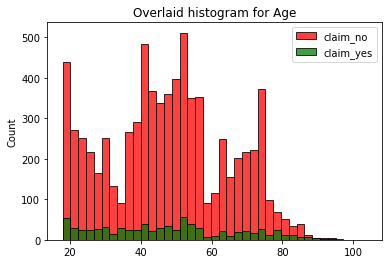

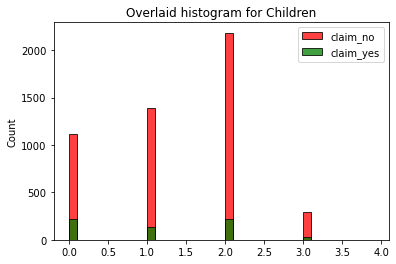

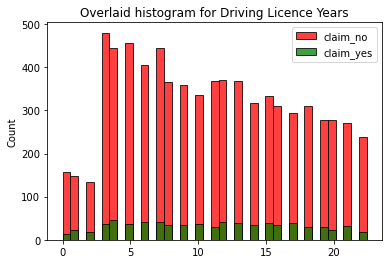

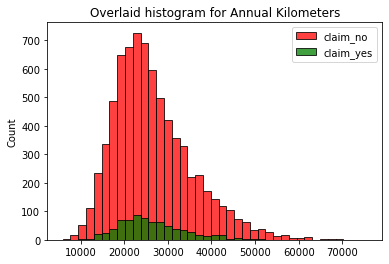

In [24]:
for i in ['Age', 'Children', 'Driving Licence Years', 'Annual Kilometers']:
    claim_no = list(Auto_cont[Auto_cont['Claim'] == 0][i].dropna())
    claim_yes = list(Auto_cont[Auto_cont['Claim'] == 1][i].dropna())
    xmin = min(min(claim_no), min(claim_yes))
    xmax = max(max(claim_no), max(claim_yes))
    width = (xmax - xmin) / 40
    sns.histplot(claim_no, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(claim_yes, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['claim_no', 'claim_yes'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()
    
# визуализируем данные по количественным признакам, разбив их по Claim

<Figure size 432x288 with 0 Axes>

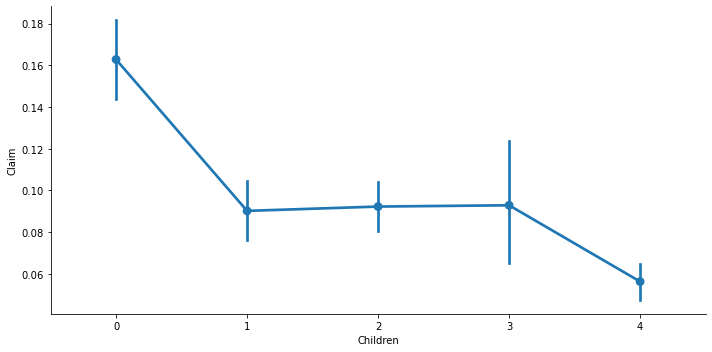

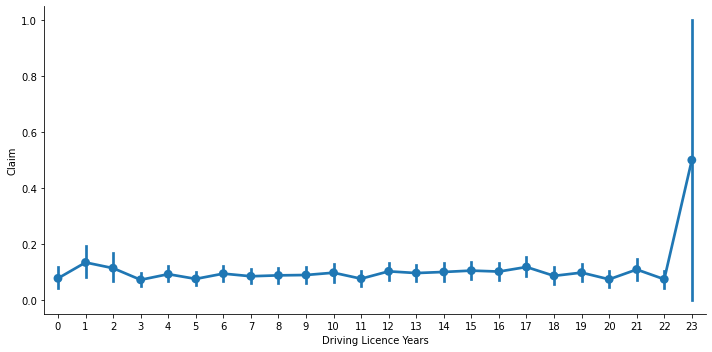

In [25]:
for i, col in enumerate(['Children', 'Driving Licence Years']):
    plt.figure(i)
    sns.catplot(x=col, y='Claim', data=Auto_cont, kind='point', aspect=2,)
    
# вероятность получения положительного решения
# подтверждаем, что Children является наиболее весомым фактором

## Зависимость от категориальных признаков 

In [26]:
Auto_cat = AutoInsuranceRisk.drop(cont_feat, axis=1)
Auto_cat.head()

# выделили исключительно количественные признаки

,Gender,Profession,Customer Type,Multiple cars,Car category,Gearbox,Fuel,Claim
0,0,0.100890,0,1,0.094122,0,0,0
1,0,0.083969,1,0,0.052058,1,0,0
2,0,0.053623,0,0,0.052058,0,0,0
3,0,0.053623,1,0,0.094122,0,0,0
4,1,0.083969,0,0,0.052058,0,0,0


<Figure size 432x288 with 0 Axes>

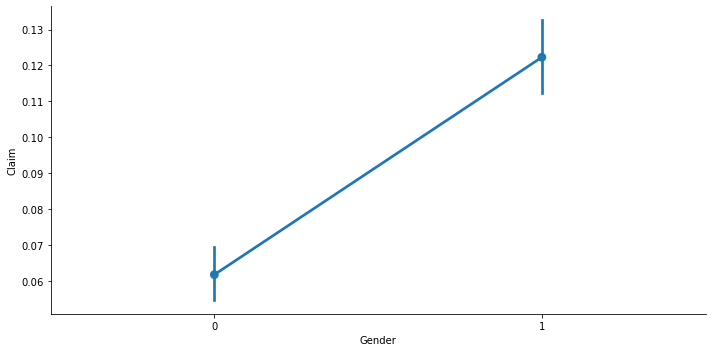

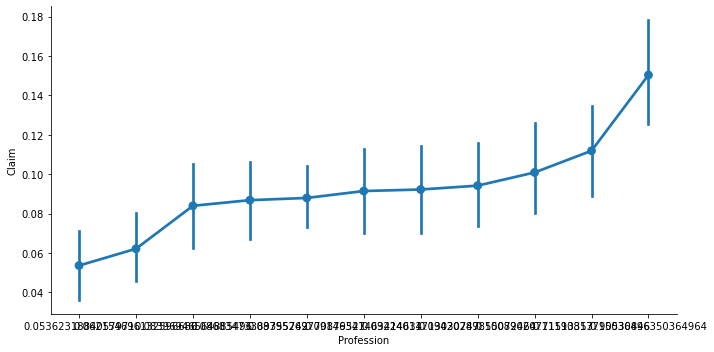

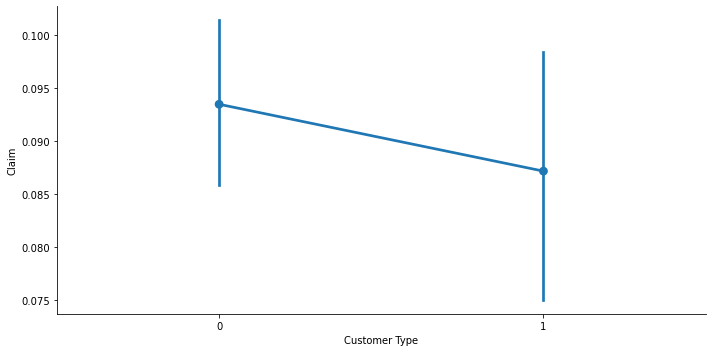

In [27]:
for i, col in enumerate(['Gender', 'Profession', 'Customer Type']):
    plt.figure(i)
    sns.catplot(x=col, y='Claim', data=Auto_cat, kind='point', aspect=2,)
    
# визуализируем зависимость вероятности получения положительного решения от признаков

<Figure size 432x288 with 0 Axes>

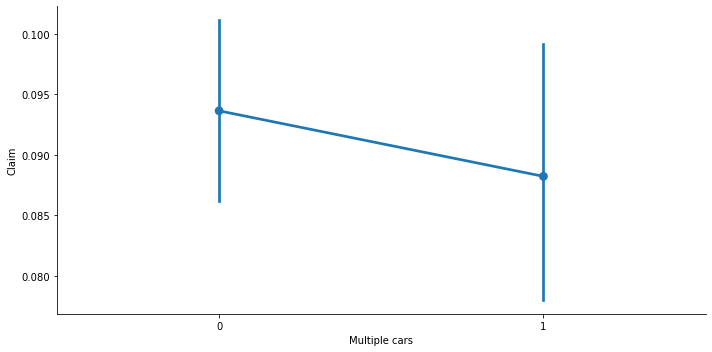

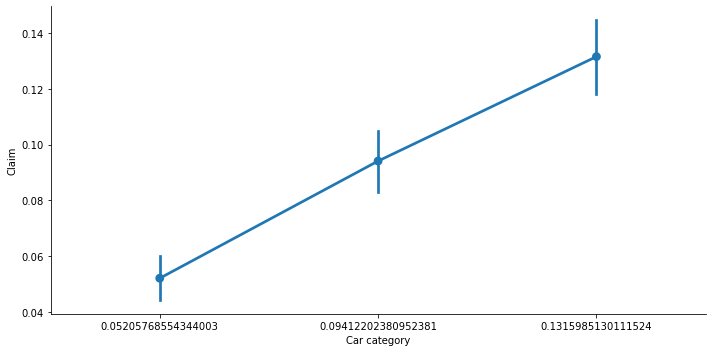

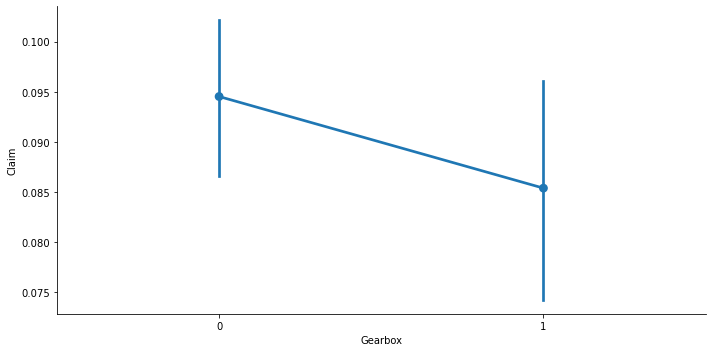

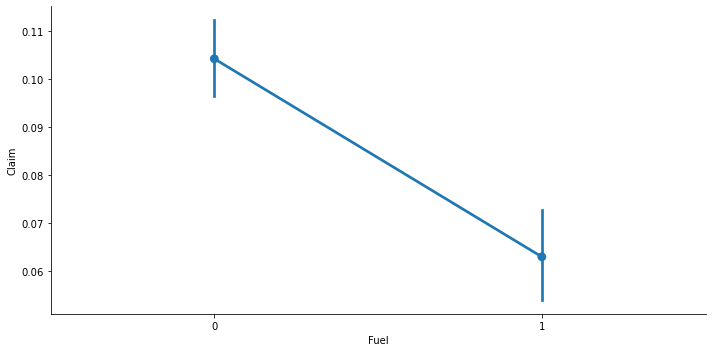

In [28]:
for i, col in enumerate(['Multiple cars', 'Car category', 'Gearbox', 'Fuel']):
    plt.figure(i)
    sns.catplot(x=col, y='Claim', data=Auto_cat, kind='point', aspect=2,)

наиболее весомыми категориальными признаками по итогам визуализации являются: Gender, Car category

# Предсказания

C:\Users\79165\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claim', ylabel='count'>

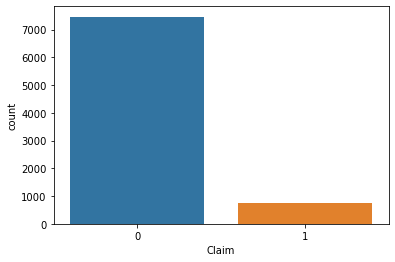

In [29]:
sns.countplot(AutoInsuranceRisk['Claim'], x='Claim')
# учитывая, что категории по таргету Claim не сбалансированы, качественные результаты предсказаний получить сложно
# вероятно, все предсказанные решения будут отрицательными

## Разделение выборок

In [30]:
Auto = AutoInsuranceRisk[['Age', 'Gender', 'Children', 'Car category', 'Claim']]
Auto.head()
# для проведения дальнейших манипуляций, оставляем только наиболее весомые признаки

,Age,Gender,Children,Car category,Claim
0,44,0,4,0.094122,0
1,21,0,0,0.052058,0
2,76,0,1,0.052058,0
3,29,0,4,0.094122,0
4,44,1,0,0.052058,0


In [31]:
features = Auto.drop('Claim', axis=1)
labels = Auto['Claim']

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

for data in [train_labels, test_labels]:
    print(round(len(data) / len(labels), 2))
    
# разделили выборки на тренировочную и тестовую в пропорции 80 на 20

0.8
0.2


## Cross Validation, RandomForest

In [32]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)
scores
# разбивает данные на 5 секций, проводим кросс валидацию с RandomForest

array([0.87765957, 0.8851711 , 0.8608365 , 0.8851711 , 0.88593156])

In [33]:
hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [4, 8, 16, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

# подбираем оптимальные значения гиперпараметров

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16, None],
                         'n_estimators': [5, 25, 50, 100]})

In [34]:
def results(results):
    print('Optimal Hyperparams: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [35]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 4, 'n_estimators': 25}

Mean 0.906 Standard Deviation 0.002 Hyperparameters {'max_depth': 4, 'n_estimators': 5}
Mean 0.907 Standard Deviation 0.001 Hyperparameters {'max_depth': 4, 'n_estimators': 25}
Mean 0.907 Standard Deviation 0.001 Hyperparameters {'max_depth': 4, 'n_estimators': 50}
Mean 0.907 Standard Deviation 0.001 Hyperparameters {'max_depth': 4, 'n_estimators': 100}
Mean 0.9 Standard Deviation 0.008 Hyperparameters {'max_depth': 8, 'n_estimators': 5}
Mean 0.902 Standard Deviation 0.007 Hyperparameters {'max_depth': 8, 'n_estimators': 25}
Mean 0.903 Standard Deviation 0.007 Hyperparameters {'max_depth': 8, 'n_estimators': 50}
Mean 0.903 Standard Deviation 0.007 Hyperparameters {'max_depth': 8, 'n_estimators': 100}
Mean 0.876 Standard Deviation 0.01 Hyperparameters {'max_depth': 16, 'n_estimators': 5}
Mean 0.877 Standard Deviation 0.011 Hyperparameters {'max_depth': 16, 'n_estimators': 25}
Mean 0.881 Standard Deviation 0.015 Hyperparameters {

In [36]:
rf1 = RandomForestClassifier(n_estimators=25, max_depth=4)
rf1.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(max_depth=4, n_estimators=25)

In [37]:
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                rf1.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
# предупреждение возникает из-за отсутствия положительных ответов в предсказании
# Модель предсказывает исключительно Claim = No

Max Depth: 4 || Estimators: 25 || Accuracy: 0.913 || Precision: 0.0 || Recall: 0.0


C:\Users\79165\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LogisticRegression

In [38]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(train_features, train_labels)

LogisticRegression()

In [40]:
log_reg.score(test_features, test_labels)
# вероятность правильного предсказания

0.9130699088145897

In [41]:
сlaim = log_reg.predict(test_features)
print("да", sum(сlaim != 0))
print("нет", sum(сlaim == 0))

# Логистическая регрессия также предсказывает исключительно Claim = No

да 0
нет 1645


array([[1502,    0],
       [ 143,    0]], dtype=int64)

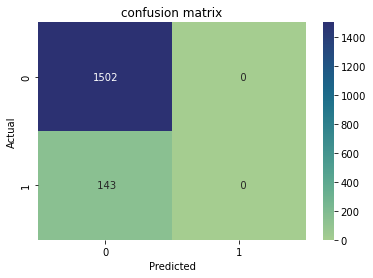

In [42]:
conf_mx = confusion_matrix(test_labels, сlaim)

sns.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
plt.ylabel('Actual')
plt.xlabel('Predicted')
conf_mx

# Confusion Matrix
# TN = 1502
# FP = 0 (Type 1 err)
# FN = 143 (Type 2 err)
# TP = 0

## KNeighbors

In [43]:
k_range = range(1, 15)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features,train_labels)
    pred_labels=knn.predict(test_features)
    scores[k] = metrics.accuracy_score(test_labels, pred_labels)
    scores_list.append(metrics.accuracy_score(test_labels, pred_labels))

In [44]:
scores

{1: 0.8358662613981763,
 2: 0.902127659574468,
 3: 0.888145896656535,
 4: 0.9106382978723404,
 5: 0.9045592705167174,
 6: 0.9094224924012158,
 7: 0.9082066869300912,
 8: 0.9094224924012158,
 9: 0.9082066869300912,
 10: 0.9130699088145897,
 11: 0.9130699088145897,
 12: 0.9130699088145897,
 13: 0.9130699088145897,
 14: 0.9130699088145897}

Text(0, 0.5, 'Accuracy')

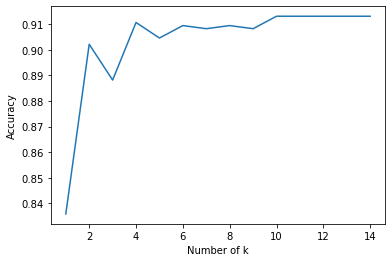

In [45]:
plt.plot(k_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

In [46]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=11)

# Оценка вероятности страхового случая для 40-летнего мужчины без детей на SUV

In [48]:
d = {'Age': 40, 'Gender': 1, 'Children': 0, 'Car category': 0.05205769}
pred_features = pd.DataFrame(data=d, index=[0])
pred_features

# 40-летний мужчина, не имеющего детей, на машине типа SUV.

,Age,Gender,Children,Car category
0,40,1,0,0.052058


In [50]:
likelihood_estimate_rf = rf1.predict_proba(pred_features)
probability_of_claim_rf = likelihood_estimate_rf[0][1]
probability_of_claim_rf

0.13156229535265343

In [51]:
likelihood_estimate_lr = log_reg.predict_proba(pred_features)
probability_of_claim_lr = likelihood_estimate_lr[0][1]
probability_of_claim_lr

0.16858004163228746

In [52]:
likelihood_estimate_knn = knn.predict_proba(pred_features)
probability_of_claim_knn = likelihood_estimate_knn[0][1]
probability_of_claim_knn

0.18181818181818182